
# <span style="color:rgb(213,80,0)">International trade data</span>

This file creates Figures 5.27 and 5.28

## Data loading

In [1]:
clear
load inttrade.mat
X=inttrade{:,1};
y=inttrade{:,2};

n=size(X,1);
seq=(1:n)';
% n1 = number of units from first group
n1=100;
clev=1-0.01/n;
% nsamp = number of samples to extract
nsamp=2000;
Snsamp=nsamp;
% lw = line width for regression line
lw=2;
prin=0;

## Create Figure 5.27


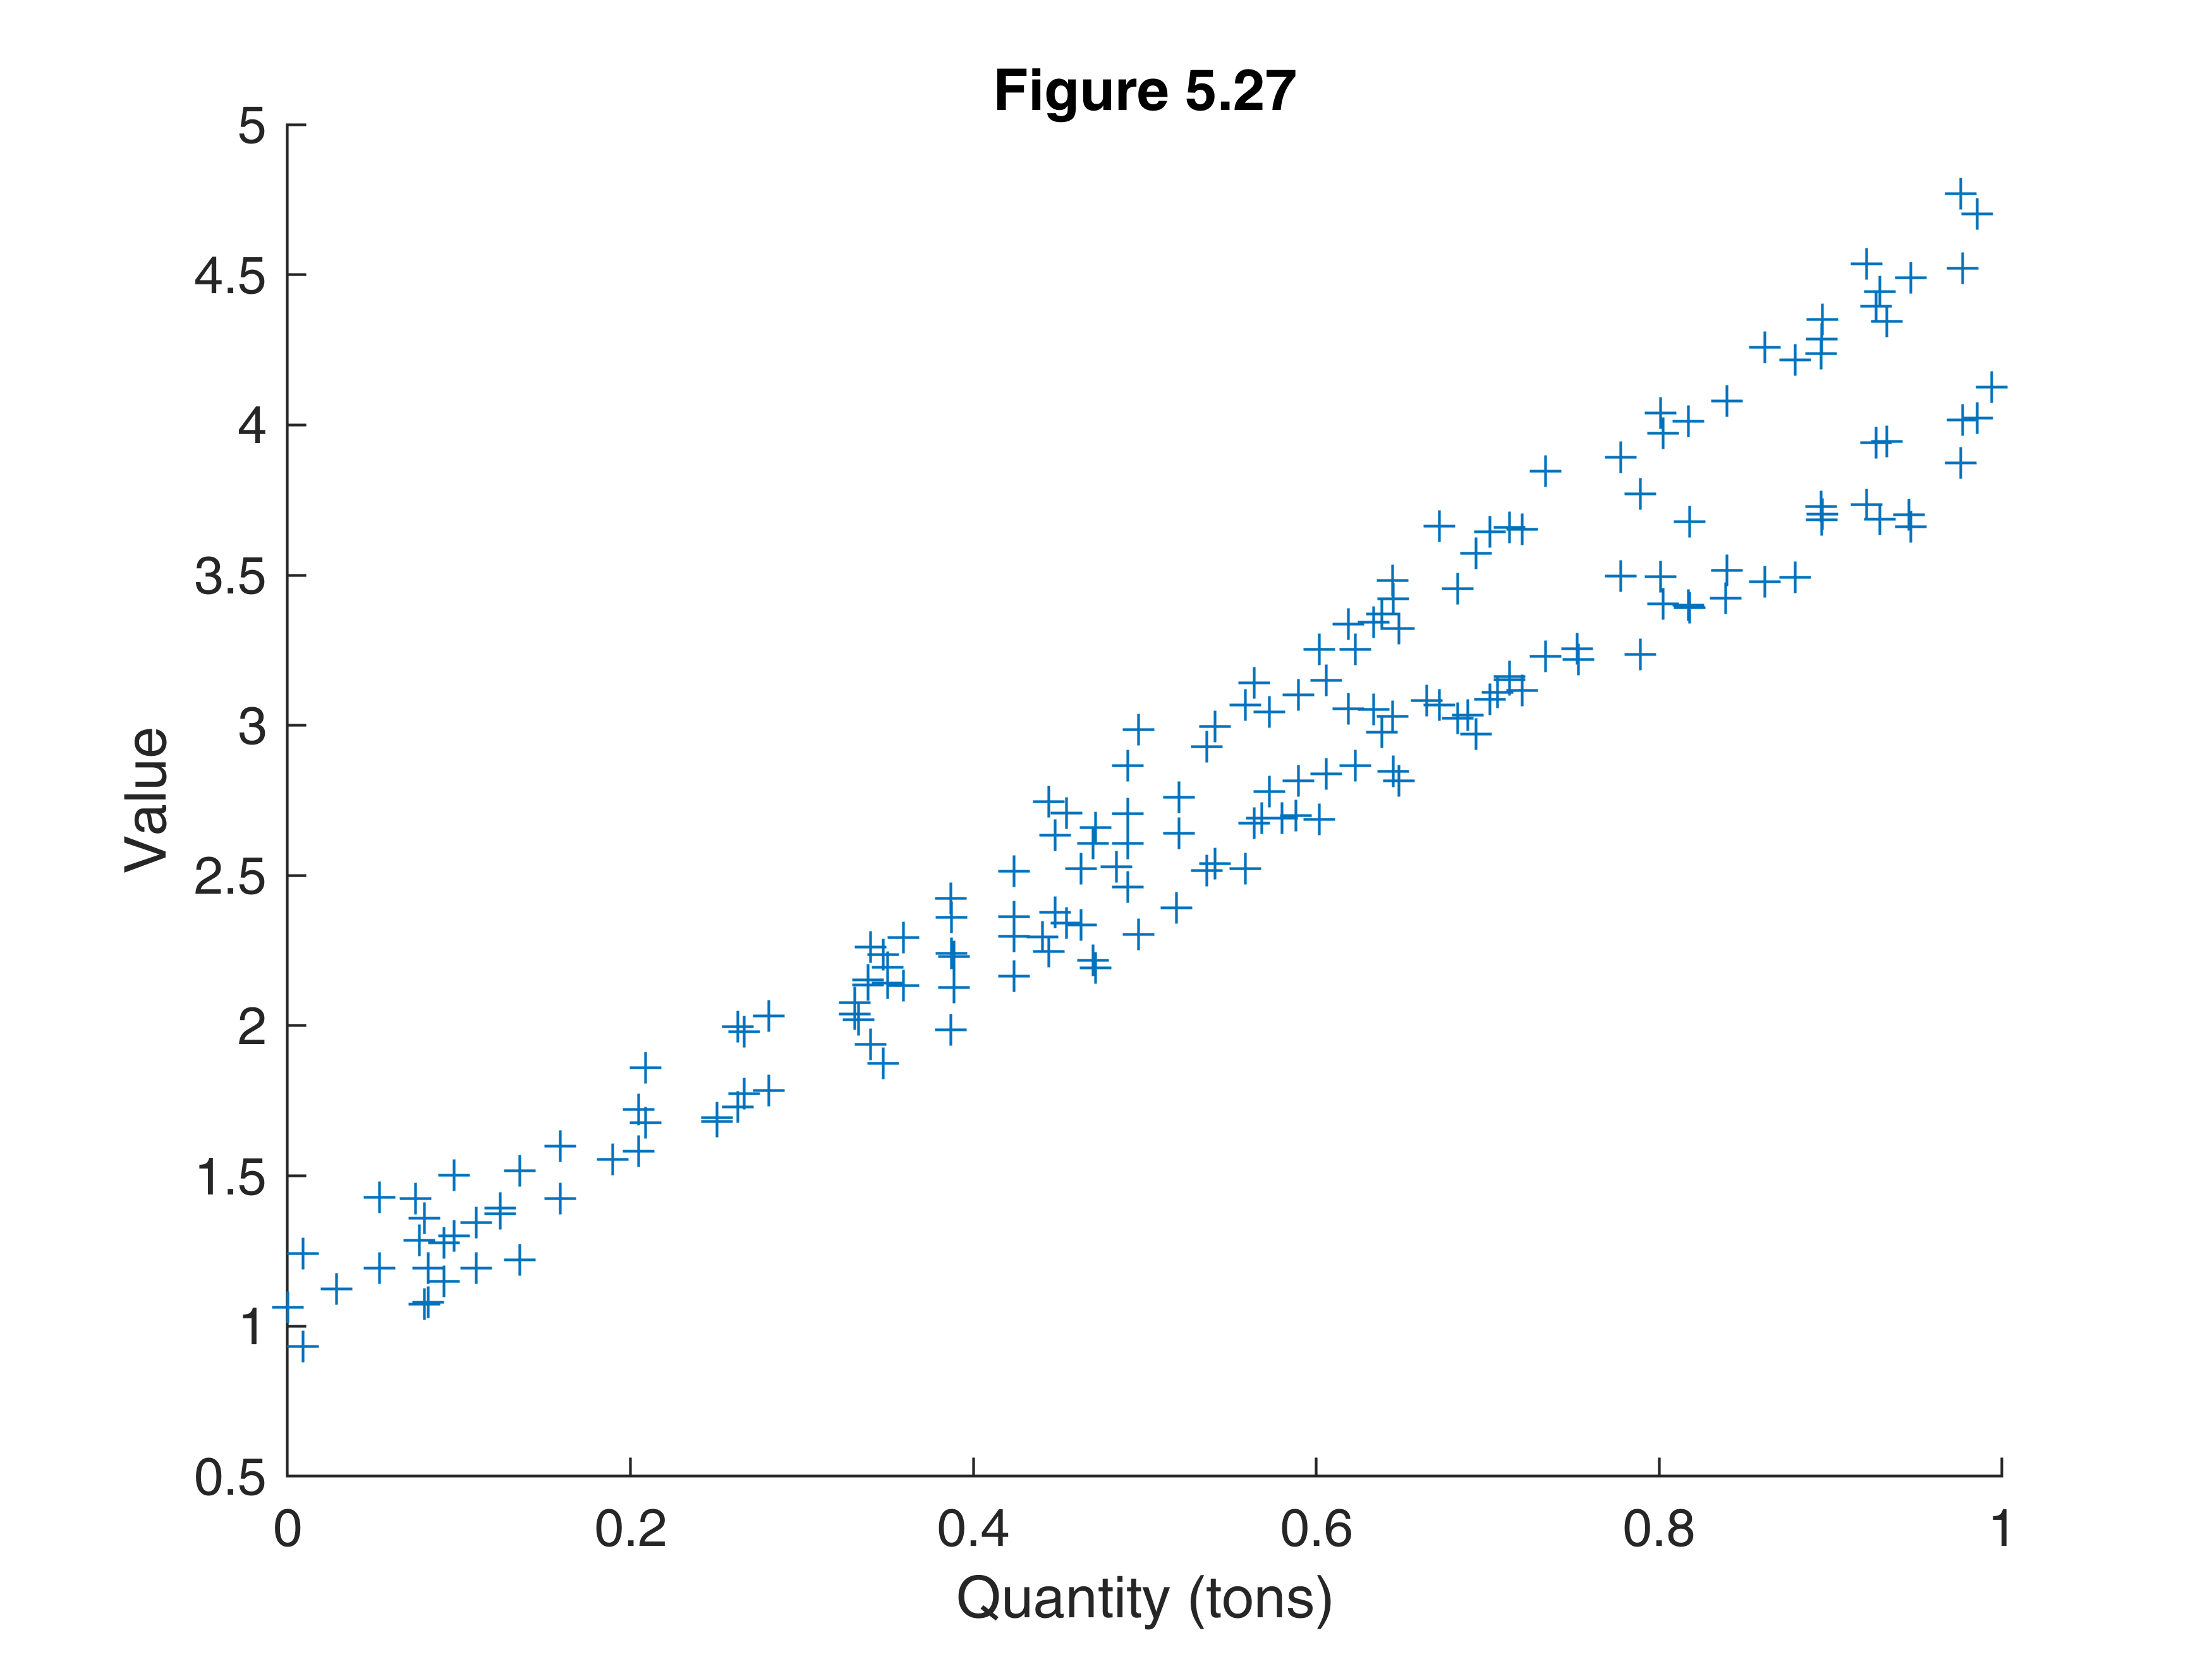

In [2]:
scatter(inttrade,'Weight','Value','Marker','+')
xlabel('Quantity (tons)')
if prin==1
    % print to postscript
    print -depsc SIM4.eps;
else
    title('Figure 5.27')
    set(gcf,"Name",'Figure 5.27')
end

## Create input calculations for figure 5.28

In [3]:
% FS
[outFS]=FSR(y,X,'nsamp',nsamp,'plots',0,'msg',0,'init',n/2);
% Store a and b of the estimated regression line (plane)
FSab=outFS.beta;

% LTS raw
[outLTS]=LXS(y,X,'nsamp',nsamp,'conflev',clev,'lms',0,'msg',0);
LTab=outLTS.beta';

% LTS with reweighting (conflev of reweighting is the usual 0.975)
[outLTSr]=LXS(y,X,'nsamp',nsamp,'conflevrew',0.975,'conflev',clev,'rew',1,'lms',0,'msg',0);
LTabr=outLTSr.beta';

% S estimators
[outS]=Sreg(y,X,'nsamp',Snsamp,'conflev',clev,'msg',0);
Sab=outS.beta';

% MM estimators with eff=0.85
outMM=MMregcore(y,X,outS.beta,outS.scale,'conflev',clev,'eff',0.85);
MMab=outMM.beta';

## Create Figure 5.28 (6 panels plot)


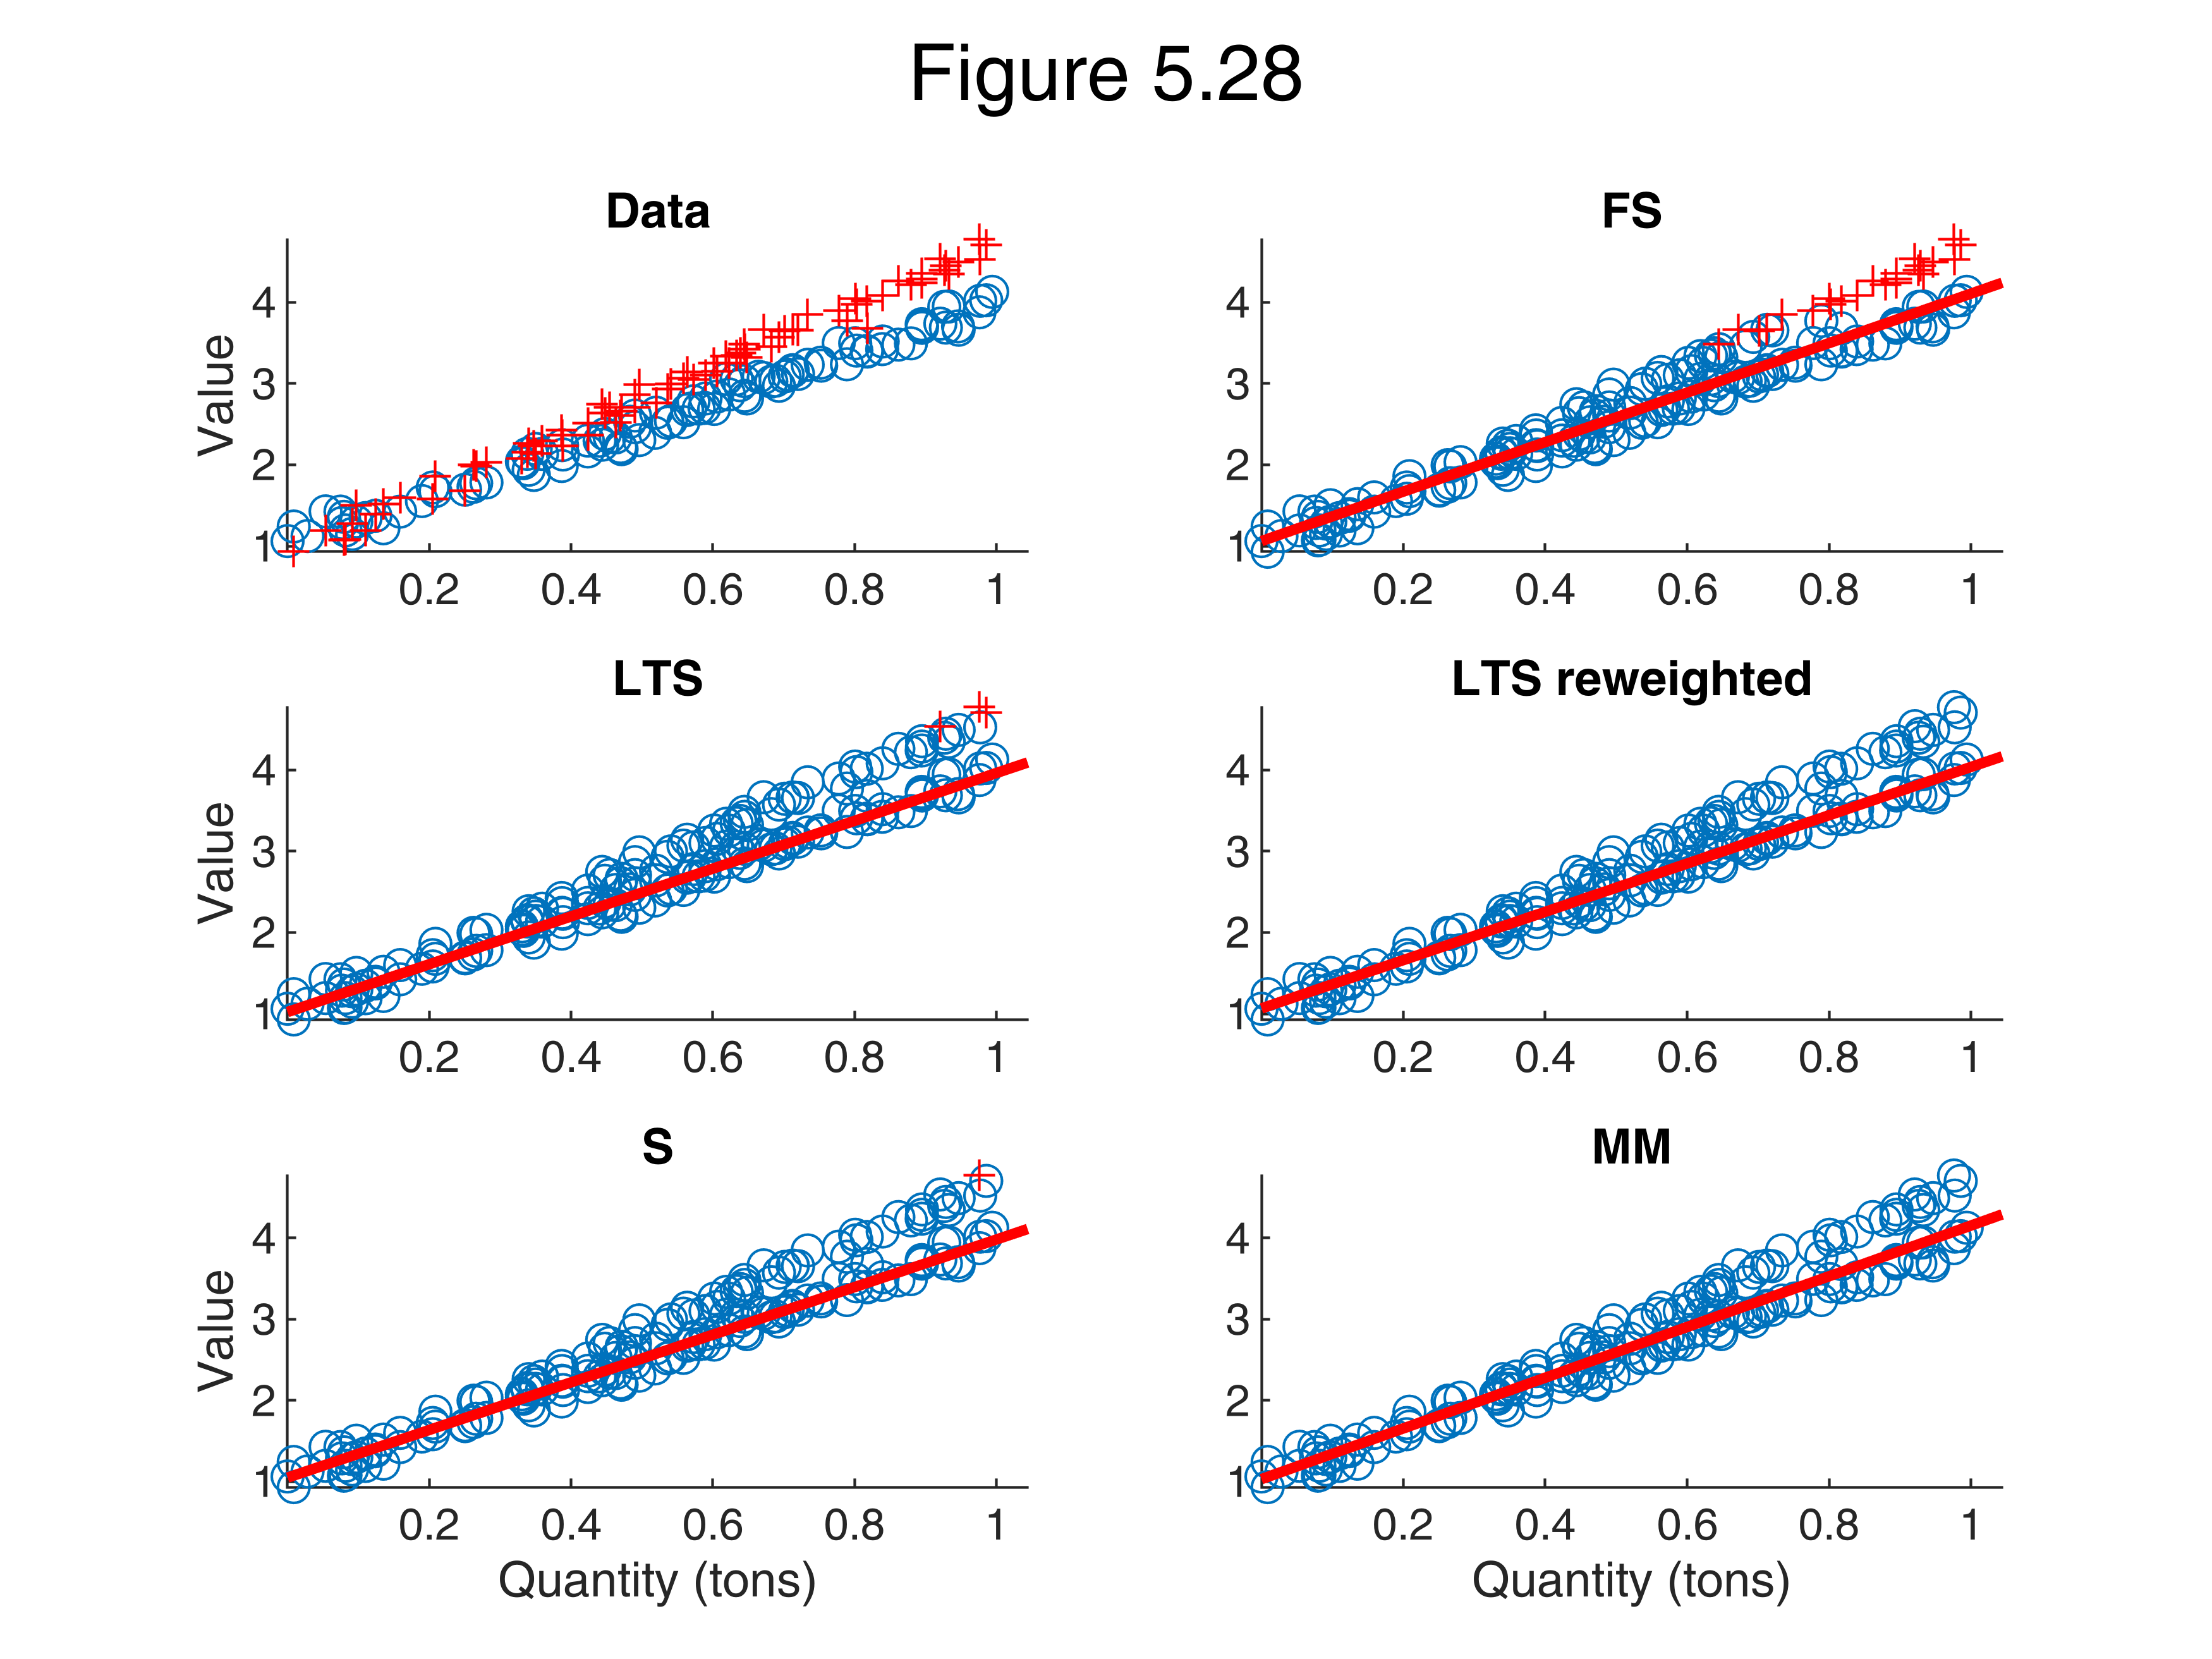

In [4]:
figure
subplot(3,2,1)
hold('on')
plot(X(1:n1,1),y(1:n1),'o')
plot(X(n1+1:end,1),y(n1+1:end),'r+')
ylabel('Value')
title('Data')
% Set xlim and ylim for all panels
ylim([min(y) max(y)])
xlim([min(X) max(X)+0.05])
v=axis;
au=v(1:2)';

subplot(3,2,2)
% results from FS
hold('on')

good=setdiff(seq,outFS.outliers);
plot(X(good),y(good),'o')
plot(X(outFS.outliers,1),y(outFS.outliers),'r+')
plot(au,FSab(1)+FSab(2)*au,'r','LineWidth',lw)
title('FS');
ylim([v(3) v(4)])
xlim([v(1) v(2)])

% results from LTS
subplot(3,2,3)
hold('on')
good=setdiff(seq,outLTS.outliers);
plot(X(good),y(good),'o')
plot(X(outLTS.outliers,1),y(outLTS.outliers),'r+')
plot(au,LTab(1)+LTab(2)*au,'r','LineWidth',lw)

title('LTS');
ylabel('Value')
ylim([v(3) v(4)])
xlim([v(1) v(2)])

% results from LTS reweighted
subplot(3,2,4)
hold('on')
good=setdiff(seq,outLTSr.outliers);
plot(X(good),y(good),'o')
plot(X(outLTSr.outliers,1),y(outLTSr.outliers),'r+')
plot(au,LTabr(1)+LTabr(2)*au,'r','LineWidth',lw)

title('LTS reweighted');
ylim([v(3) v(4)])
xlim([v(1) v(2)])

% results from S estimation
subplot(3,2,5)
hold('on')
good=setdiff(seq,outS.outliers);
plot(X(good),y(good),'o')
plot(X(outS.outliers,1),y(outS.outliers),'r+')
plot(au,Sab(1)+Sab(2)*au,'r','LineWidth',lw)

title('S');
xlabel('Quantity (tons)')
ylabel('Value')
ylim([v(3) v(4)])
xlim([v(1) v(2)])

% results from MM estimation
subplot(3,2,6)
hold('on')
good=setdiff(seq,outMM.outliers);
plot(X(good),y(good),'o')
plot(X(outMM.outliers,1),y(outMM.outliers),'r+')
plot(au,MMab(1)+MMab(2)*au,'r','LineWidth',lw)

title('MM');
xlabel('Quantity (tons)')
ylim([v(3) v(4)])
xlim([v(1) v(2)])

if prin==1
    print -depsc tradedata.eps;
else
    sgtitle('Figure 5.28')
    set(gcf,"Name",'Figure 5.28')
end

In [5]:

%InsideREADME